In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.style.use('ggplot')

In [2]:
# load data
data = pd.read_csv('../input/irisdata/iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# understand data statistics
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


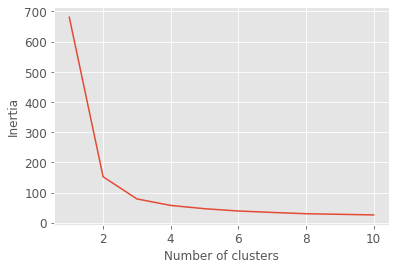

In [4]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Elbow forms at 3, optimal clusters 3

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

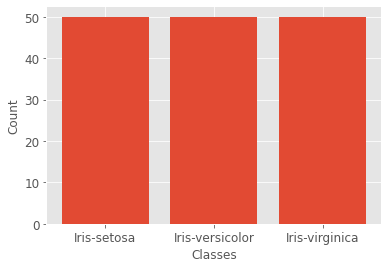

In [5]:
# check distribution of classes
plt.bar(data['Species'].value_counts().index, data['Species'].value_counts().values)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)

Classes are balanced

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

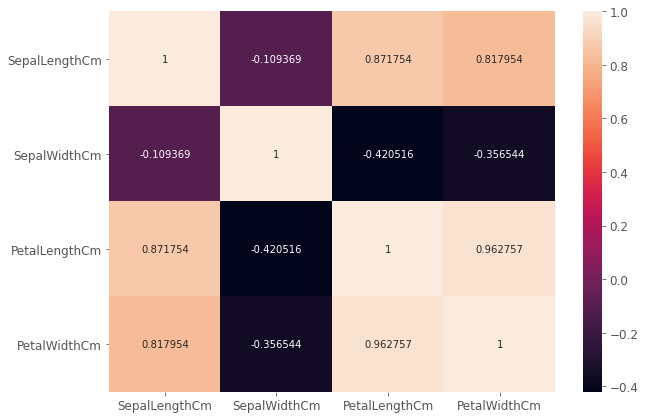

In [6]:
# correlation between different columns
plt.figure(figsize=(10,7))
sns.heatmap(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(), fmt='g', annot=True)
plt.yticks(rotation=0)

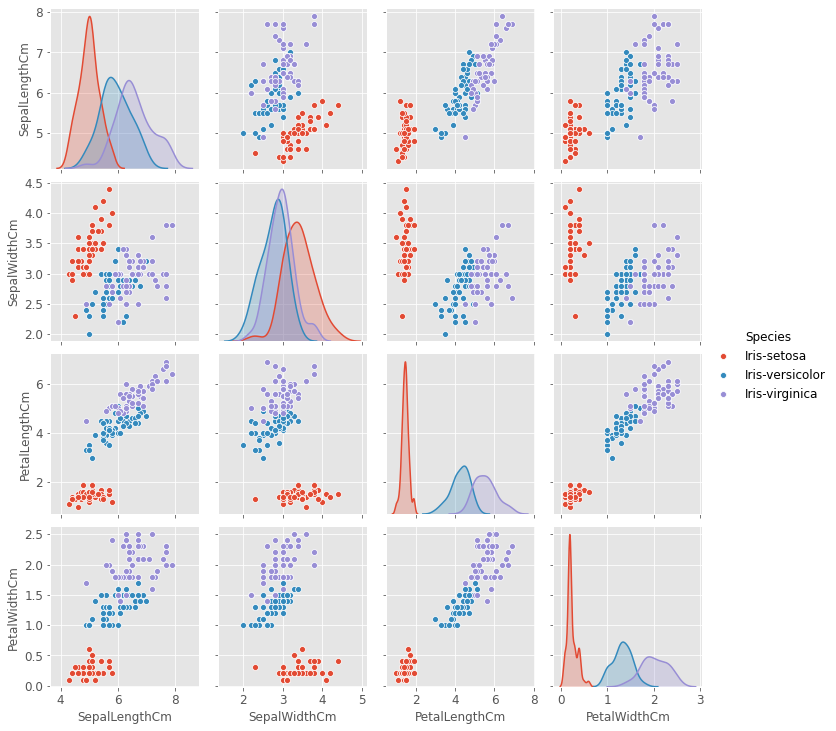

In [7]:
# visualize datapoints based on different combinations of columns
sns.pairplot(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], kind="scatter", hue="Species")

In [8]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [9]:
# define and fit model
kmeans = KMeans(n_clusters=3, max_iter=300)   # three classes
kmeans.fit(x)

KMeans(n_clusters=3)

In [10]:
# predictions and generate corresponding labels
predictions = kmeans.predict(x)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

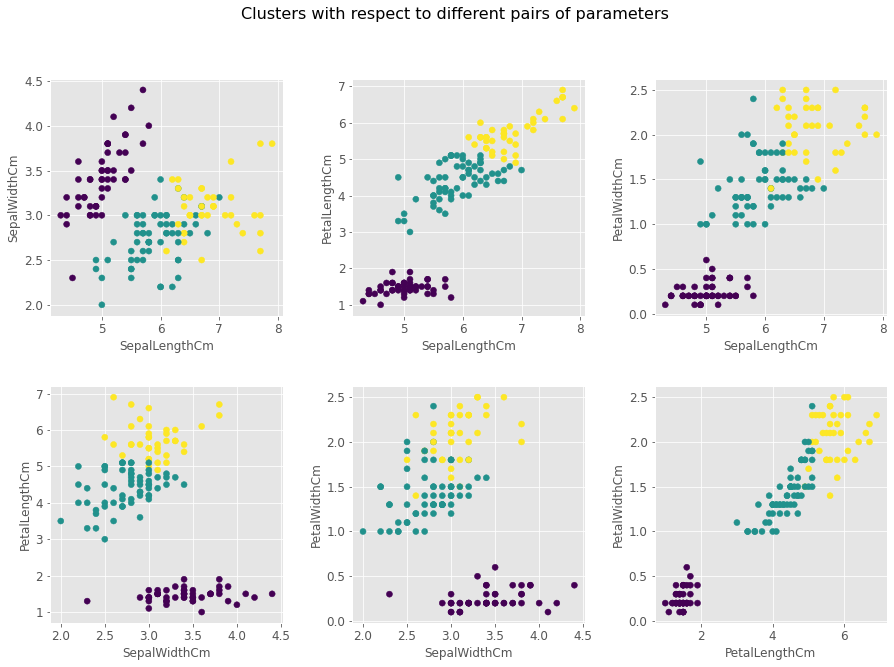

In [11]:
# visualize the clusters with respect to different pairs of parameters

fig, ax = plt.subplots(2,3, figsize=(15,10))

ax[0][0].scatter(x=data['SepalLengthCm'], y=data['SepalWidthCm'], c=predictions)
ax[0][0].set_xlabel('SepalLengthCm')
ax[0][0].set_ylabel('SepalWidthCm')

ax[0][1].scatter(x=data['SepalLengthCm'], y=data['PetalLengthCm'], c=predictions)
ax[0][1].set_xlabel('SepalLengthCm')
ax[0][1].set_ylabel('PetalLengthCm')

ax[0][2].scatter(x=data['SepalLengthCm'], y=data['PetalWidthCm'], c=predictions)
ax[0][2].set_xlabel('SepalLengthCm')
ax[0][2].set_ylabel('PetalWidthCm')

ax[1][0].scatter(x=data['SepalWidthCm'], y=data['PetalLengthCm'], c=predictions)
ax[1][0].set_xlabel('SepalWidthCm')
ax[1][0].set_ylabel('PetalLengthCm')

ax[1][1].scatter(x=data['SepalWidthCm'], y=data['PetalWidthCm'], c=predictions)
ax[1][1].set_xlabel('SepalWidthCm')
ax[1][1].set_ylabel('PetalWidthCm')

ax[1][2].scatter(x=data['PetalLengthCm'], y=data['PetalWidthCm'], c=predictions)
ax[1][2].set_xlabel('PetalLengthCm')
ax[1][2].set_ylabel('PetalWidthCm')

fig.suptitle('Clusters with respect to different pairs of parameters', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.3)